In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv("supermarket.csv")

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

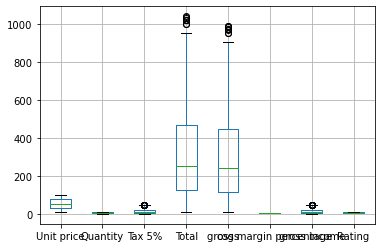

In [8]:
df.boxplot()

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unit price                  45.060000
Quantity                     5.000000
Tax 5%                      16.520375
Total                      346.927875
cogs                       330.407500
gross margin percentage      0.000000
gross income                16.520375
Rating                       3.000000
dtype: float64


In [23]:
df_outlier= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_outlier.shape)

(991, 17)


<ipython-input-23-2632b943bda3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outlier= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-23-2632b943bda3>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outlier= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

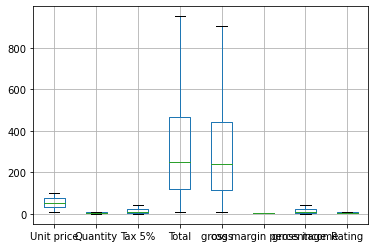

In [24]:
df_outlier.boxplot()

In [25]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               991 non-null    object 
 1   Branch                   991 non-null    object 
 2   City                     991 non-null    object 
 3   Customer type            991 non-null    object 
 4   Gender                   991 non-null    object 
 5   Product line             991 non-null    object 
 6   Unit price               991 non-null    float64
 7   Quantity                 991 non-null    int64  
 8   Tax 5%                   991 non-null    float64
 9   Total                    991 non-null    float64
 10  Date                     991 non-null    object 
 11  Time                     991 non-null    object 
 12  Payment                  991 non-null    object 
 13  cogs                     991 non-null    float64
 14  gross margin percentage  9

In [13]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [26]:
df_outlier["Branch"].value_counts()

A    339
B    330
C    322
Name: Branch, dtype: int64

In [16]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [28]:
df_outlier["Customer type"].value_counts()

Member    498
Normal    493
Name: Customer type, dtype: int64

In [30]:
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [31]:
df_outlier["Gender"].value_counts()

Male      496
Female    495
Name: Gender, dtype: int64

In [32]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [33]:
df_outlier["Payment"].value_counts()

Cash           342
Ewallet        342
Credit card    307
Name: Payment, dtype: int64

In [36]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [37]:
df_outlier["City"].value_counts()

Yangon       339
Mandalay     330
Naypyitaw    322
Name: City, dtype: int64

In [38]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [39]:
df_outlier["Product line"].value_counts()

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: Product line, dtype: int64

In [49]:
df["Quantity"].value_counts()

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

In [50]:
df_outlier["Quantity"].value_counts()

1     112
10    110
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

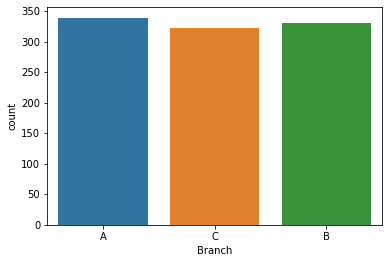

In [41]:
sns.countplot(x="Branch",data=df_outlier)

<AxesSubplot:xlabel='Customer type', ylabel='count'>

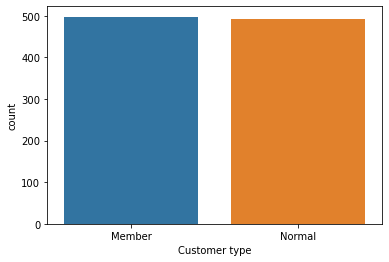

In [42]:
sns.countplot(x="Customer type",data=df_outlier)

<AxesSubplot:xlabel='Gender', ylabel='count'>

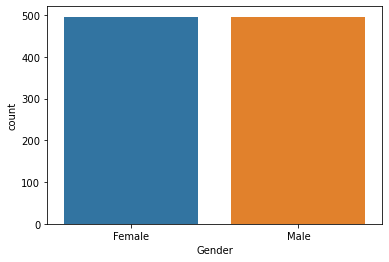

In [43]:
sns.countplot(x="Gender",data=df_outlier)

<AxesSubplot:xlabel='Payment', ylabel='count'>

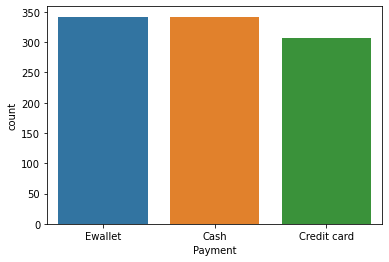

In [44]:
sns.countplot(x="Payment",data=df_outlier)

<AxesSubplot:xlabel='City', ylabel='count'>

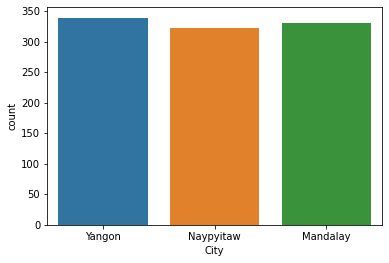

In [45]:
sns.countplot(x="City",data=df_outlier)

<AxesSubplot:xlabel='Product line', ylabel='count'>

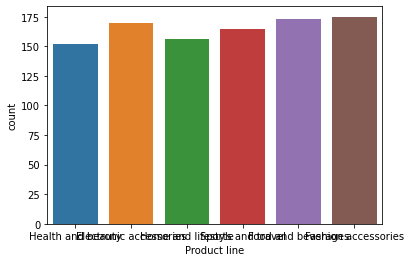

In [47]:
sns.countplot(x="Product line",data=df_outlier)

<AxesSubplot:xlabel='Quantity', ylabel='count'>

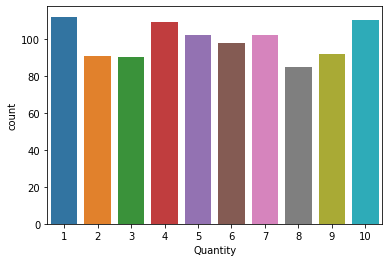

In [48]:
sns.countplot(x="Quantity",data=df_outlier)

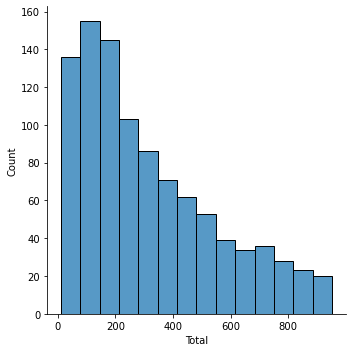

In [51]:
sns.displot(df_outlier["Total"])

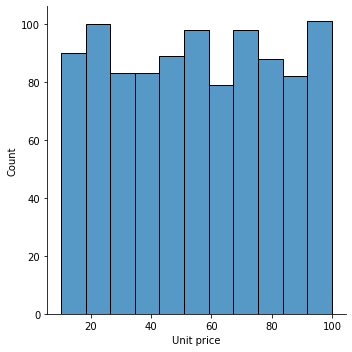

In [52]:
sns.displot(df_outlier["Unit price"])

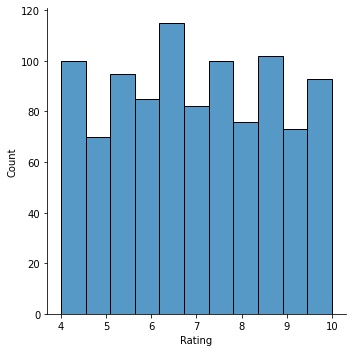

In [54]:
sns.displot(df_outlier["Rating"])

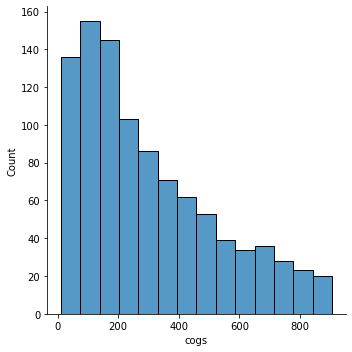

In [55]:
sns.displot(df_outlier["cogs"])

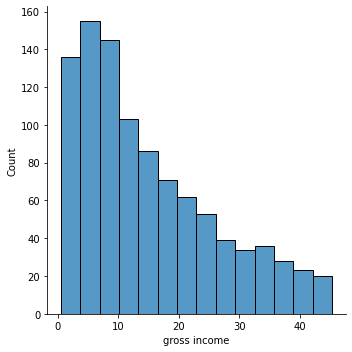

In [57]:
sns.displot(df_outlier["gross income"])

<AxesSubplot:xlabel='Branch', ylabel='count'>

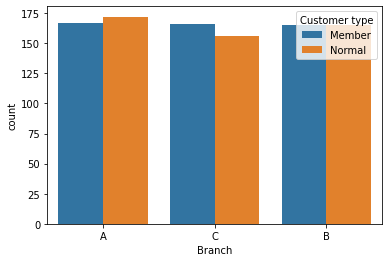

In [60]:
sns.countplot(x="Branch",hue="Customer type",data=df_outlier)

<AxesSubplot:xlabel='Gender', ylabel='count'>

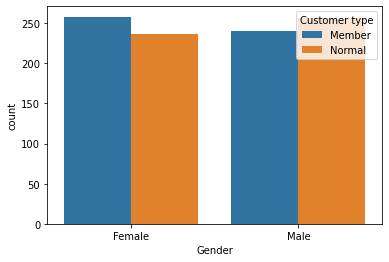

In [61]:
sns.countplot(x="Gender",hue="Customer type",data=df_outlier)

<AxesSubplot:xlabel='Quantity', ylabel='count'>

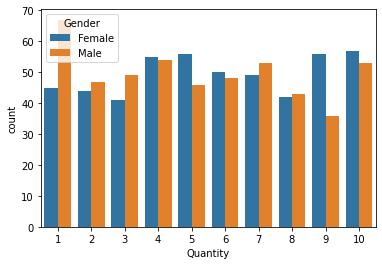

In [70]:
sns.countplot(x="Quantity",hue="Gender",data=df_outlier)

<AxesSubplot:xlabel='Customer type', ylabel='count'>

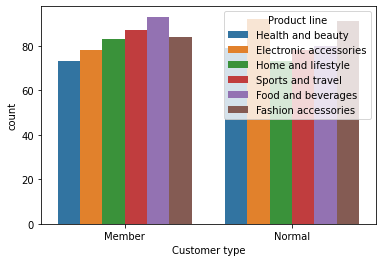

In [72]:
sns.countplot(x="Customer type",hue="Product line",data=df_outlier)

<AxesSubplot:xlabel='Gender', ylabel='count'>

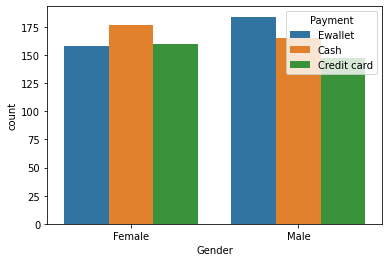

In [64]:
sns.countplot(x="Gender",hue="Payment",data=df_outlier)

<AxesSubplot:xlabel='City', ylabel='count'>

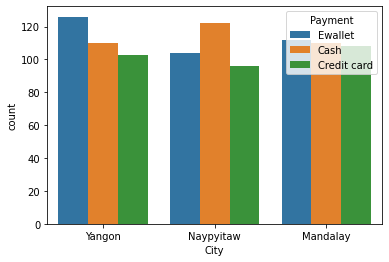

In [65]:
sns.countplot(x="City",hue="Payment",data=df_outlier)

<AxesSubplot:xlabel='Product line', ylabel='count'>

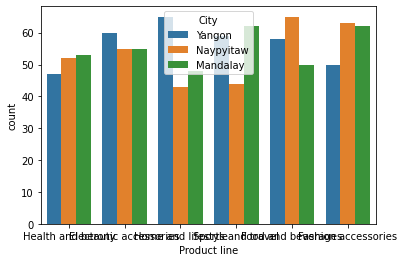

In [66]:
sns.countplot(x="Product line",hue="City",data=df_outlier)

<AxesSubplot:xlabel='Quantity', ylabel='count'>

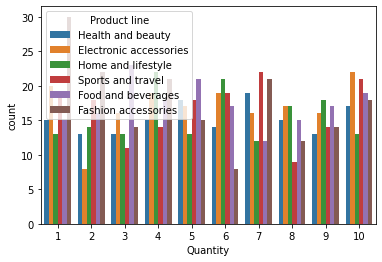

In [67]:
sns.countplot(x="Quantity",hue="Product line",data=df_outlier)

<AxesSubplot:xlabel='Branch', ylabel='count'>

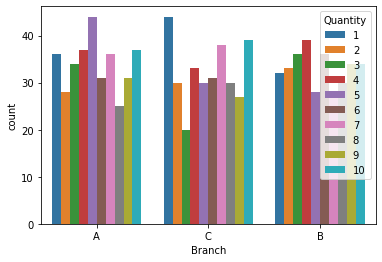

In [68]:
sns.countplot(x="Branch",hue="Quantity",data=df_outlier)

<AxesSubplot:xlabel='Payment', ylabel='count'>

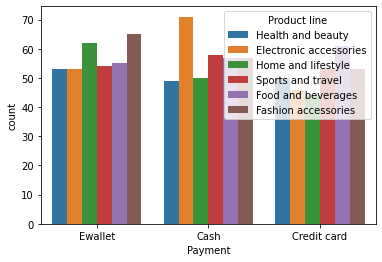

In [69]:
sns.countplot(x="Payment",hue="Product line",data=df_outlier)

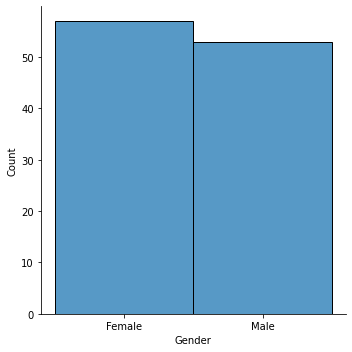

In [80]:
sns.displot(df_outlier[df_outlier["Quantity"]==10]["Gender"])

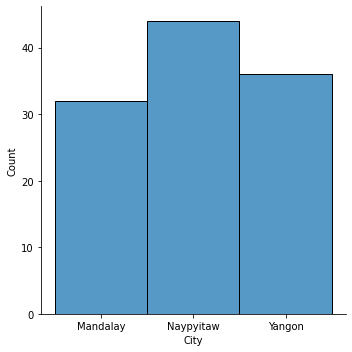

In [79]:
sns.displot(df_outlier[df_outlier["Quantity"]==1]["City"])

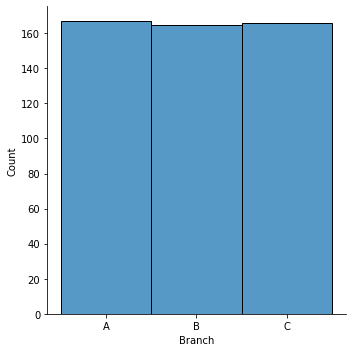

In [83]:
sns.displot(df_outlier[df_outlier["Customer type"]=="Member"]["Branch"])

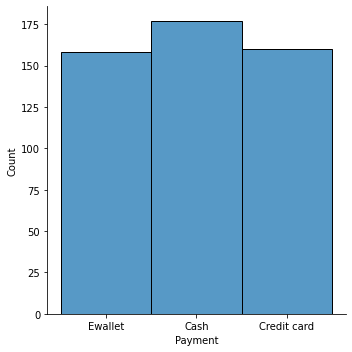

In [86]:
sns.displot(df_outlier[df_outlier["Gender"]=="Female"]["Payment"])

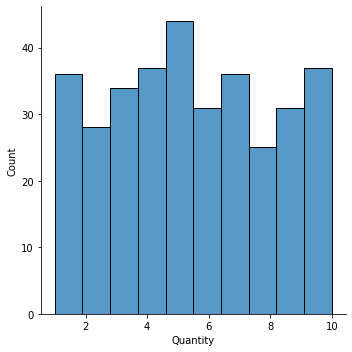

In [89]:
sns.displot(df_outlier[df_outlier["City"]=="Yangon"]["Quantity"])

In [90]:
pd.crosstab(df_outlier["Branch"],df_outlier["Customer type"])

Customer type,Member,Normal
Branch,,
A,167,172
B,165,165
C,166,156


In [91]:
pd.crosstab(df_outlier["Customer type"],df_outlier["Gender"])

Gender,Female,Male
Customer type,,
Member,258,240
Normal,237,256


In [93]:
pd.crosstab(df_outlier["Gender"],df_outlier["Payment"])

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,177,160,158
Male,165,147,184


In [94]:
pd.crosstab(df_outlier["City"],df_outlier["Product line"])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,55,62,50,53,48,62
Naypyitaw,55,63,65,52,43,44
Yangon,60,50,58,47,65,59


In [95]:
pd.crosstab(df_outlier["Product line"],df_outlier["Customer type"])

Customer type,Member,Normal
Product line,,
Electronic accessories,78,92
Fashion accessories,84,91
Food and beverages,93,80
Health and beauty,73,79
Home and lifestyle,83,73
Sports and travel,87,78


In [96]:
pd.crosstab(df_outlier["Quantity"],df_outlier["Product line"])

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Quantity,,,,,,
1,20,30,15,15,13,19
2,8,22,16,13,14,18
3,16,14,23,13,13,11
4,19,21,18,15,22,14
5,17,15,21,18,13,18
6,19,8,17,14,21,19
7,16,21,12,19,12,22
8,17,12,15,15,17,9
9,16,14,17,13,18,14


In [97]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [98]:
df_outlier.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,NaN,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,NaN,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Total,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,NaN,-0.026092,1.000000


<AxesSubplot:>

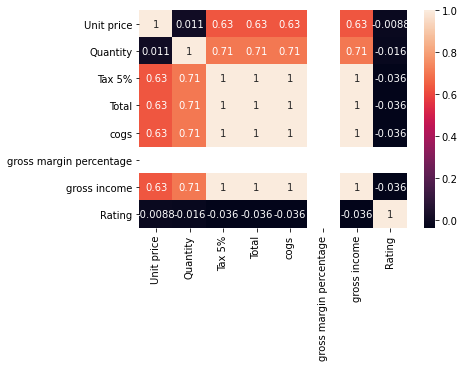

In [99]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

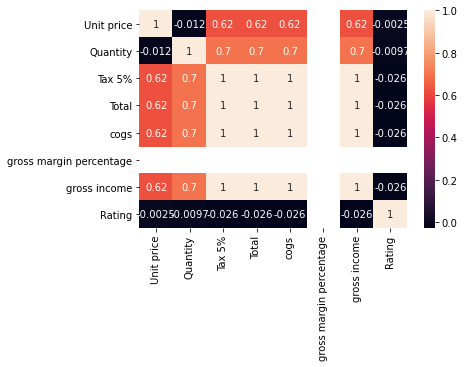

In [100]:
sns.heatmap(df_outlier.corr(),annot=True)